## Combining two coefficients with different tlist

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.testing import assert_array_equal

In [16]:
def _fill_coeff(old_coeff, old_tlist, new_tlist):
    new_n = len(new_tlist)
    old_n = len(old_tlist)
    old_ind = 0
    new_coeff = np.zeros(new_n)
    for new_ind in range(new_n):
        t = new_tlist[new_ind]
        if t < old_tlist[0]:
            new_coeff[new_ind] = 0.
            continue
        if t > old_tlist[-1]:
            new_coeff[new_ind] = 0.
            continue
        if old_tlist[old_ind+1] == t:
            old_ind += 1
        new_coeff[new_ind] = old_coeff[old_ind]
    return new_coeff


def combine_coeffs(coeff1, coeff2, tlist1, tlist2):
    new_tlist = np.unique(np.sort(np.hstack((tlist1, tlist2))))
    new_coeff1 = _fill_coeff(coeff1, tlist1, new_tlist)
    new_coeff2 = _fill_coeff(coeff2, tlist2, new_tlist)
    return new_coeff1, new_coeff2, new_tlist

### Application: adding noise to a signal

In [17]:
coeff = np.array([0, 1, 2, 3, 4, 5, 5], dtype=float)
tlist = np.array([0, 1, 2, 3, 4, 5, 6], dtype=float)
noise = np.random.normal(0.0, 0.2, 50)
noise_tlist = np.linspace(0, 6 ,50)
new_coeff1, new_coeff2, new_tlist = combine_coeffs(coeff, noise, tlist, noise_tlist)

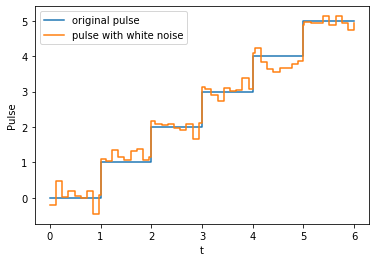

In [18]:
plt.step(tlist, coeff, where="post", label="original pulse")
plt.step(new_tlist, new_coeff1 + new_coeff2, where="post", label="pulse with white noise")
plt.xlabel("t")
plt.ylabel("Pulse")
plt.legend()

## Test

In [19]:
# group1
coeff1 = np.array(    [ 3,    5, 2, 1, 3, 2, 1,    2    ], dtype=float)
tlist1 = np.array(    [ 0,    2, 3, 4, 5, 6, 7,    9    ], dtype=float)
# group2
coeff2 = np.array(    [    3, 7, 4,       3, 5,        1], dtype=float)
tlist2 = np.array(    [    1, 2, 3,       6, 7,       10], dtype=float)
res = combine_coeffs(coeff1, coeff2, tlist1, tlist2)

new_coeff1 = np.array([3, 3, 5, 2, 1, 3, 2, 1,     2,  0], dtype=float)
new_coeff2 = np.array([0, 3, 7, 4, 4, 4, 3, 5,     5,  1], dtype=float)
new_tlist = np.array( [0, 1, 2, 3, 4, 5, 6, 7,     9, 10], dtype=float)
assert_array_equal(res[0], new_coeff1)
assert_array_equal(res[1], new_coeff2)
assert_array_equal(res[2], new_tlist)